In [575]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    VotingClassifier,
)
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

data = pd.read_csv("train.csv")
le = LabelEncoder()

data = data.head(25000)

dict = {
    "January" : 1,
    "February" : 2,
    "March" : 3,
    "April" : 4,
    "May" : 5,
    "June" : 6,
    "July" : 7,
    "August" : 8,
}

data["Month"] = data["Month"].map(dict)

data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,1,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,2,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,3,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,4,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,5,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [576]:
data.isnull().sum()

ID                            0
Customer_ID                   0
Month                         0
Name                         98
Age                           0
SSN                           0
Occupation                    0
Annual_Income                 0
Monthly_Inhand_Salary       155
Num_Bank_Accounts             0
Num_Credit_Card               0
Interest_Rate                 0
Num_of_Loan                   0
Type_of_Loan                168
Delay_from_due_date           0
Num_of_Delayed_Payment       76
Changed_Credit_Limit          0
Num_Credit_Inquiries         25
Credit_Mix                    0
Outstanding_Debt              0
Credit_Utilization_Ratio      0
Credit_History_Age           95
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Amount_invested_monthly      46
Payment_Behaviour             0
Monthly_Balance              17
Credit_Score                  0
dtype: int64

In [577]:
data.describe()

,Month,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,1000.000000,845.000000,1000.000000,1000.000000,1000.000000,1000.000000,975.000000,1000.000000,1000.000000
mean,4.500000,4462.535093,10.935000,26.783000,83.111000,21.693000,13.694359,32.170609,1472.216076
std,2.292434,3123.601366,79.197911,147.942668,510.892781,16.364857,104.269656,5.142146,7972.497257
min,1.000000,519.128750,0.000000,1.000000,1.000000,-2.000000,0.000000,21.744884,0.000000
25%,2.750000,1828.240000,3.000000,4.000000,7.000000,9.000000,2.000000,27.979514,29.045533
50%,4.500000,3260.465000,6.000000,5.000000,14.000000,17.000000,4.000000,32.163236,69.685459
75%,6.250000,6300.581667,8.000000,7.000000,20.000000,28.000000,9.000000,36.486123,185.631542
max,8.000000,12432.610000,1488.000000,1385.000000,5565.000000,67.000000,1936.000000,46.194238,81441.000000


In [578]:
columns_with_underscore = [col for col in data.columns if any("_" in str(value) for value in data[col])]
columns_with_underscore

['Customer_ID',
 'Age',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Amount_invested_monthly',
 'Payment_Behaviour']

In [579]:
def remove_underscore(col):
    data[col] = data[col].apply(lambda x: str(x).replace("_", "") if str(x) else x)
    data[col] = pd.to_numeric(data[col], errors="coerce")


data["Num_of_Loan"].fillna("-100")
data["Num_of_Delayed_Payment"].fillna("-1")



remove_underscore("Age")
remove_underscore("Num_of_Delayed_Payment")
remove_underscore("Changed_Credit_Limit")
remove_underscore("Outstanding_Debt")
remove_underscore("Amount_invested_monthly")
remove_underscore("Monthly_Balance")

In [580]:
dict = {
    'High_spent_Small_value_payments' : 0,
       'Low_spent_Large_value_payments' : 1,
       'Low_spent_Medium_value_payments' : 2,
       'Low_spent_Small_value_payments' : 3,
       'High_spent_Medium_value_payments' : 4, 
       '!@9#%8' : np.nan,
       'High_spent_Large_value_payments': 5}

data['Payment_Behaviour'] = data['Payment_Behaviour'].map(dict)

data["Payment_Behaviour"].describe()


count    921.000000
mean       2.773073
std        1.553947
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Payment_Behaviour, dtype: float64

In [581]:
def find_mean(i, col):
    mean = 0
    j = i
    while j != i + 8:
        value = data.at[j, col]
        if pd.notna(value) and (np.issubdtype(type(value), np.floating)or np.issubdtype(type(value), np.integer)):
            mean += float(value)
        j += 1
    return mean / 8


def find_mode(i, col):
    mode = {}
    j = i

    while j != i + 8:
        value = data.at[j, col]
        if pd.notna(value) and (np.issubdtype(type(value), np.floating) or (np.issubdtype(type(value), np.integer) and value > 0)):
            if data.at[j, col] in mode:
                mode[value] += 1
            else:
                mode[value] = 1
        j += 1

    return max(mode, key=mode.get)

def date_to_int(value):
    year = []
    month = []
    i = 0
    flag = 0

    for char in value:
        if char.isnumeric() and not flag:
            year.append(char)
        else:
            flag = 1
        
        if char.isnumeric() and flag:
            month.append(char)

    result = result = int(''.join(map(str, year))) * 12 +  int(''.join(map(str, month)))

    return result


In [582]:
def fill_missing(i,col,condition):
     index = []
     j = i
     valid = ''
     while (j != i + 8):
         if condition(j,col):
             index.append(j)
         else:
             valid = data.at[j,col]
         j+=1
     for k in index:
         data.at[k,col] = valid

def fill_with_mean(i,col,condition):
    mean = find_mean(i,col)
    j = i
    while (j != i + 8):
         if condition(j,col):
            data.at[j,col] = mean
         j+=1

def fill_with_mode(i,col,condition):
        mode = find_mode(i,col)
        j = i
        while (j != i + 8):
             if condition(j,col):
                data.at[j,col] = mode
             j+=1

def transform_dates(i):
    j = i
    while(j != i + 8):
        data.at[j, "Credit_History_Age"] = date_to_int(data.at[j, "Credit_History_Age"])
        j += 1

In [583]:
def find_missing():
    for i, row in data.iterrows():
        if i % 8 == 0:
            fill_missing(i, "Name", lambda j, col: pd.isna(data.at[j, col]))
            fill_missing(i, "Occupation", lambda j, col: "__" in data.at[j, col])
            fill_missing(i, "Credit_Mix", lambda j, col: "_" in data.at[j, col])
            fill_missing(i, "Annual_Income", lambda j, col: "_" in data.at[j, col])
            fill_missing(i, "Type_of_Loan", lambda j, col: pd.isna(data.at[j, col]))
            fill_missing(i, "Num_of_Loan", lambda j, col: "-" in data.at[j, col])
            fill_missing(i, "SSN", lambda j, col: "#" in data.at[j, col])
            fill_missing(i, "Credit_History_Age", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Changed_Credit_Limit", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Monthly_Inhand_Salary", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Delay_from_due_date", lambda j, col: data.at[j, col] < 0)
            fill_with_mean(i, "Num_of_Delayed_Payment", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Num_of_Delayed_Payment", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i, "Amount_invested_monthly", lambda j, col: data.at[j, col] == 10_000 or pd.isna(data.at[j,col]))
            fill_with_mean(i, "Monthly_Balance", lambda j, col: pd.isna(data.at[j, col]))
            fill_with_mean(i,"Num_Credit_Inquiries",lambda j, col: pd.isna(data.at[j, col]),)
            fill_with_mean(i, "Payment_Behaviour", lambda  j, col: pd.isna(data.at[j, col]))
            fill_with_mode(i, "Age", lambda j, col: "-" in str(data.at[j, col]))
            transform_dates(i)


find_missing()

data["Payment_Behaviour"].describe()

count    1000.000000
mean        2.737750
std         1.505383
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Payment_Behaviour, dtype: float64

In [584]:
remove_underscore("Num_of_Loan")
remove_underscore("Annual_Income")

In [585]:
columns_with_underscore = [col for col in data.columns if any("_" in str(value) for value in data[col])]
columns_with_underscore

['Customer_ID', 'Occupation']

In [586]:
data["Occupation"] = le.fit_transform(data["Occupation"])
data["Credit_Mix"] = le.fit_transform(data["Credit_Mix"])
data["Payment_of_Min_Amount"] = le.fit_transform(data["Payment_of_Min_Amount"])
data["Credit_Score"] = le.fit_transform(data["Credit_Score"])

data.drop("ID", axis=1, inplace=True)
data.drop("Name", axis=1, inplace=True)
data.drop("Customer_ID", axis=1, inplace=True)
data.drop("SSN", axis=1, inplace=True)
data.drop("Type_of_Loan", axis=1, inplace=True)
# data.drop("Payment_Behaviour", axis=1, inplace=True)

In [587]:
data.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.500000,99.596000,7.288000,1.795283e+05,4258.233230,10.935000,26.783000,83.111000,5.904000,21.714375,26.565500,10.316104,13.853500,1.184000,1494.994240,32.170609,1.412000,1472.216076,278.050432,2.737750,406.485493,1.312000
std,2.292434,590.103368,4.250073,1.438891e+06,3059.616321,79.197911,147.942668,510.892781,55.364682,16.336962,183.294373,6.633076,103.626018,0.823907,1216.924999,5.142146,0.684635,7972.497257,380.566153,1.505383,217.935407,0.803306
min,1.000000,14.000000,0.000000,8.701545e+03,389.346562,0.000000,1.000000,1.000000,0.000000,-0.125000,-1.000000,-4.260000,0.000000,0.000000,35.540000,21.744884,0.000000,0.000000,0.000000,0.000000,7.129357,0.000000
25%,2.750000,22.000000,4.000000,2.018602e+04,1740.539167,3.000000,4.000000,7.000000,1.000000,9.000000,8.000000,5.510000,2.000000,0.000000,585.050000,27.979514,1.000000,29.045533,81.719606,2.000000,268.213761,1.000000
50%,4.500000,32.000000,7.000000,4.134558e+04,3047.676667,6.000000,5.000000,14.000000,3.000000,17.000000,14.000000,9.215000,4.000000,1.000000,1154.460000,32.163236,2.000000,69.685459,149.396556,3.000000,348.523430,2.000000
75%,6.250000,40.000000,11.000000,7.392846e+04,5981.026250,8.000000,7.000000,20.000000,5.000000,28.000000,19.000000,14.780000,9.000000,2.000000,2174.160000,36.486123,2.000000,185.631542,286.674222,4.000000,470.464294,2.000000
max,8.000000,7580.000000,14.000000,2.233578e+07,12432.610000,1488.000000,1385.000000,5565.000000,1464.000000,67.000000,3318.000000,32.640000,1936.000000,2.000000,4984.820000,46.194238,2.000000,81441.000000,2772.302518,5.000000,1184.899694,2.000000


<Axes: ylabel='count'>

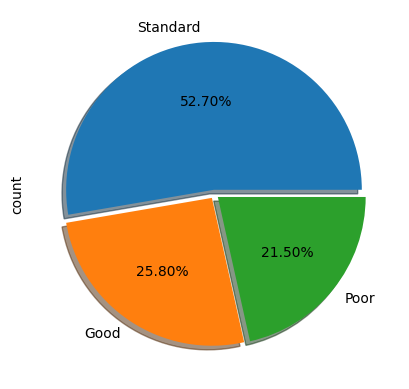

In [588]:
data["Credit_Score"].value_counts().plot.pie(explode = [0.03,0.03,0.03], autopct="%1.2f%%",shadow = True,labels = ["Standard","Good","Poor"])

In [589]:
data["Payment_Behaviour"].describe()

count    1000.000000
mean        2.737750
std         1.505383
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Payment_Behaviour, dtype: float64

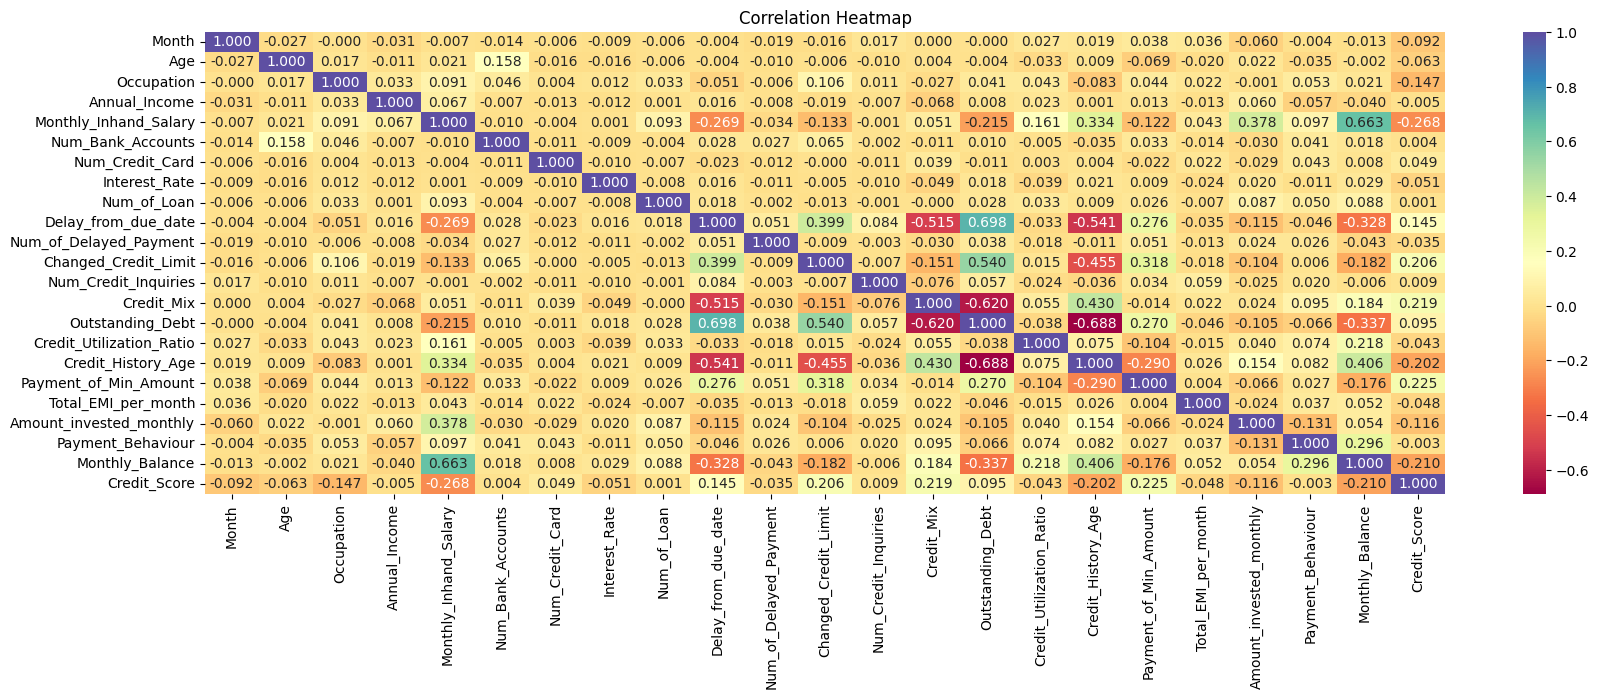

In [590]:
def show_heat_map(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(20, 6))
    heatmap = sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="Spectral",
        fmt=".3f",
    )
    plt.title("Correlation Heatmap")


show_heat_map(data)

In [591]:
def show_outliers(data,col, edge):
    fig, axs = plt.subplots(1, 2, figsize=(6, 6))
    sns.stripplot(y=col, data=data[data[col] < edge], ax=axs[0])
    axs[0].set_title(f"{col} < {edge}")
    sns.stripplot(y=col, data=data[data[col] > edge], ax=axs[1])
    axs[1].set_title(f"{col} > {edge}")

In [592]:
def outlier_one(data):
    show_outliers(data,"Age", 56)
    show_outliers(data,"Num_Bank_Accounts", 11)
    show_outliers(data,"Num_Credit_Card", 15)
    show_outliers(data,"Interest_Rate", 35)

In [593]:
def outlier_two(data):
    show_outliers(data,"Num_of_Loan", 10)
    show_outliers(data,"Num_of_Delayed_Payment", 30)
    show_outliers(data,"Num_Credit_Inquiries",27)
    show_outliers(data,"Monthly_Balance",1e-22)

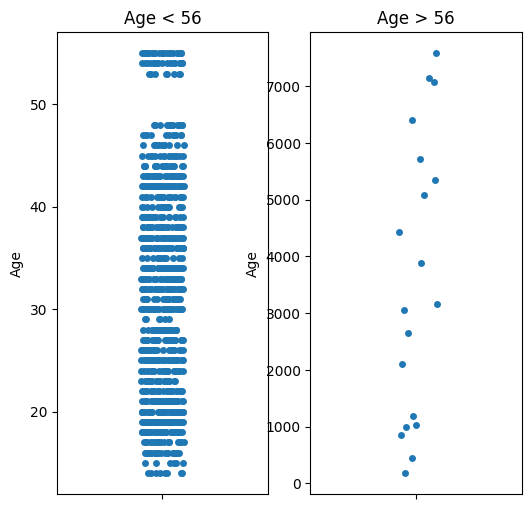

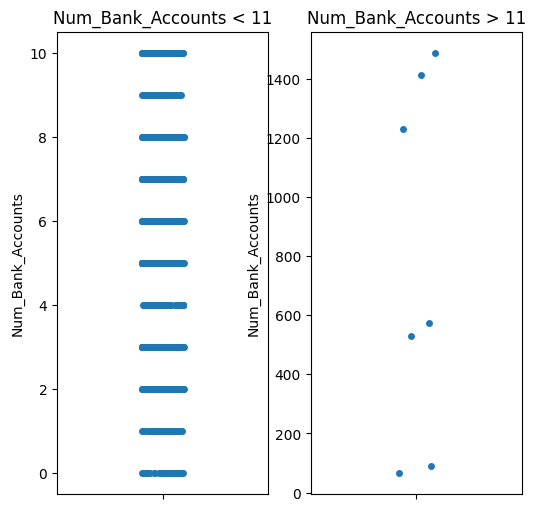

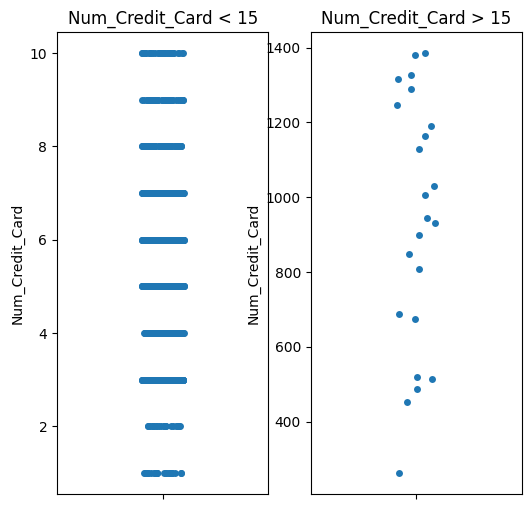

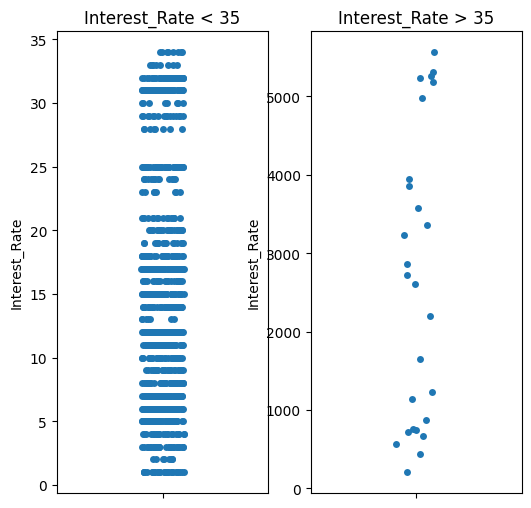

In [594]:
outlier_one(data)

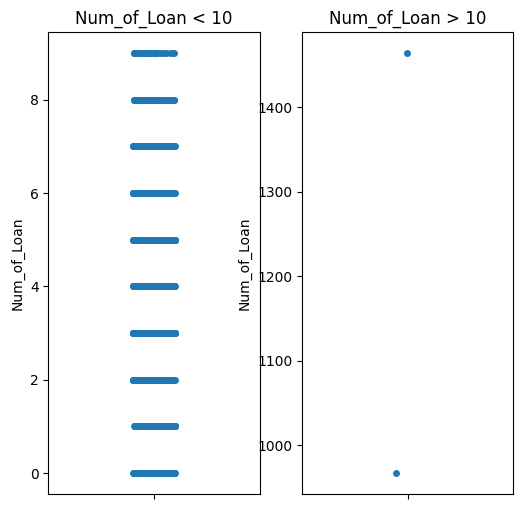

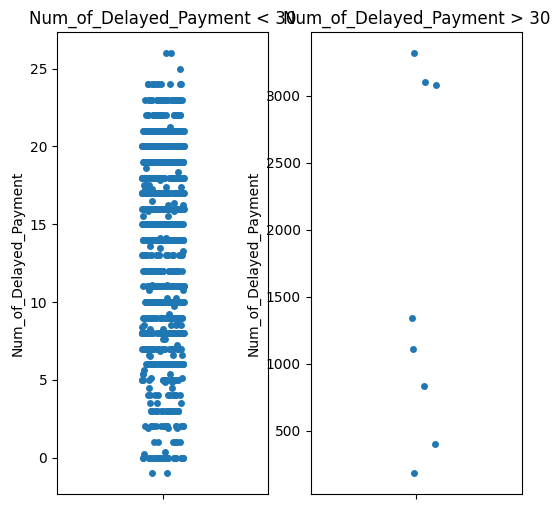

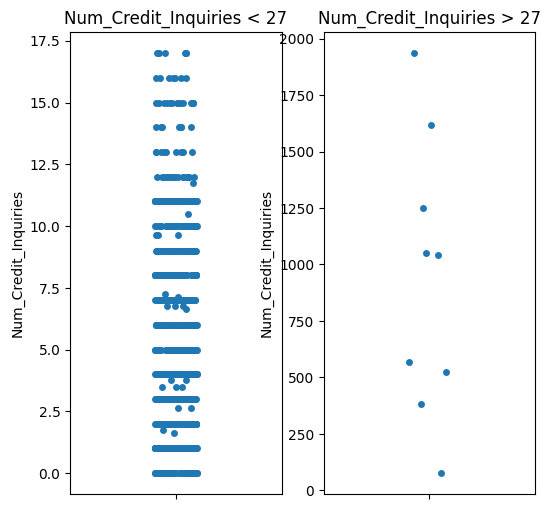

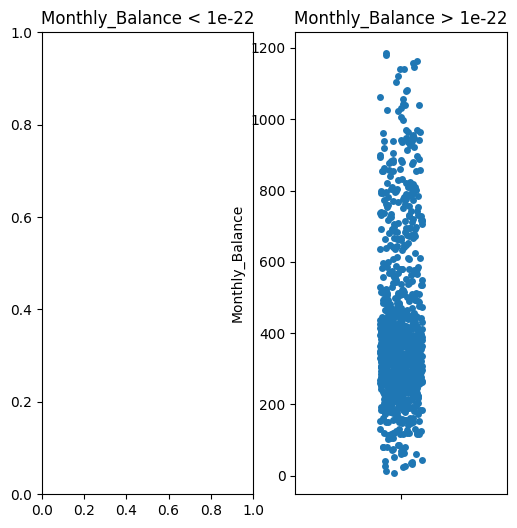

In [595]:
outlier_two(data)

In [596]:
new_data = data.copy()

cols = [
    "Age",
    "Num_Bank_Accounts",
    "Num_Credit_Card",
    "Interest_Rate",
    "Num_of_Loan",
    "Num_of_Delayed_Payment",
    "Num_Credit_Inquiries",
    "Monthly_Balance",
]


#Replace 
for col in cols:
    q1, q3 = np.percentile(new_data[col], [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    outliers_mask = (new_data[col] < lower_bound) | (new_data[col] > upper_bound)
    new_data = new_data[~outliers_mask]

new_data.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,821.000000,821.000000,821.000000,8.210000e+02,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000
mean,4.515225,31.803898,7.287454,2.002615e+05,3704.486426,5.833130,5.604141,15.103532,3.752741,22.754415,13.902406,10.613182,5.798417,1.169306,1557.040414,31.847735,1.444580,1429.527817,270.105073,2.614951,350.362171,1.376370
std,2.277424,10.472928,4.251852,1.587307e+06,2639.230597,2.596465,1.972477,9.150650,2.531462,16.732208,6.217781,6.850287,4.061271,0.853591,1257.484151,4.969039,0.692053,7879.642660,371.296751,1.449090,143.441948,0.760858
min,1.000000,14.000000,0.000000,8.701545e+03,389.346562,0.000000,1.000000,1.000000,0.000000,-0.125000,-1.000000,-4.260000,0.000000,0.000000,35.540000,21.744884,0.000000,0.000000,0.000000,0.000000,7.129357,0.000000
25%,3.000000,22.000000,4.000000,1.979552e+04,1683.101667,4.000000,5.000000,7.000000,2.000000,10.000000,9.000000,5.520000,2.000000,0.000000,585.050000,27.698524,1.000000,31.379794,77.875344,2.000000,260.080975,1.000000
50%,4.000000,32.000000,7.000000,3.484784e+04,2853.309167,6.000000,5.000000,14.000000,4.000000,19.000000,15.000000,9.300000,5.000000,1.000000,1194.280000,31.828536,2.000000,69.685459,141.187910,3.000000,333.291982,2.000000
75%,7.000000,39.000000,11.000000,6.353698e+04,5163.177500,8.000000,7.000000,20.000000,6.000000,30.000000,19.000000,15.270000,9.000000,2.000000,2258.730000,36.012794,2.000000,171.823067,274.572674,4.000000,417.836369,2.000000
max,8.000000,55.000000,14.000000,2.233578e+07,12432.610000,10.000000,10.000000,34.000000,9.000000,67.000000,26.000000,32.640000,17.000000,2.000000,4984.820000,42.769864,2.000000,81441.000000,2772.302518,5.000000,760.364955,2.000000


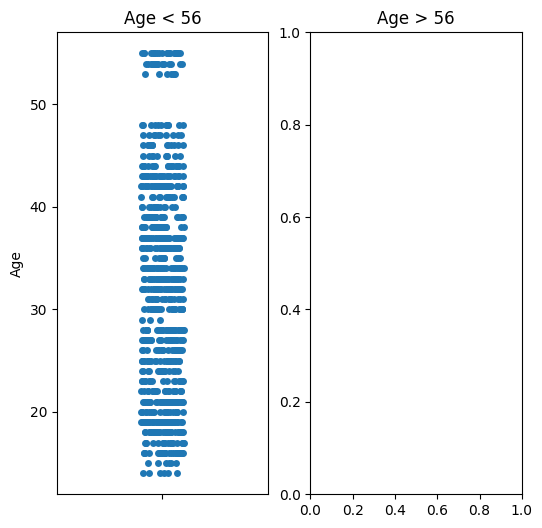

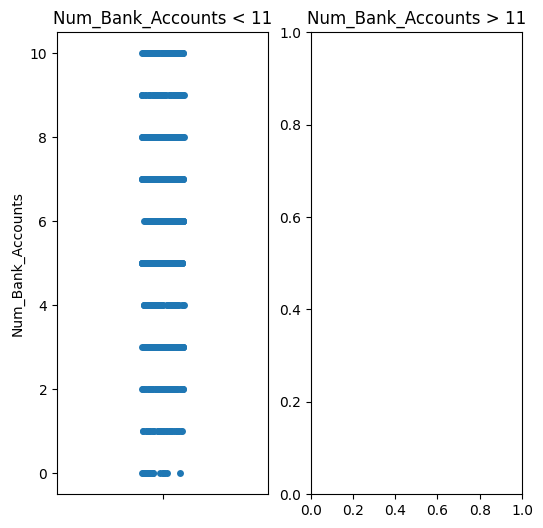

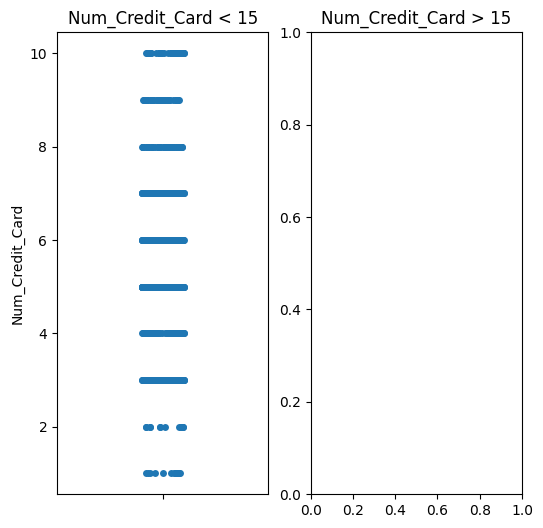

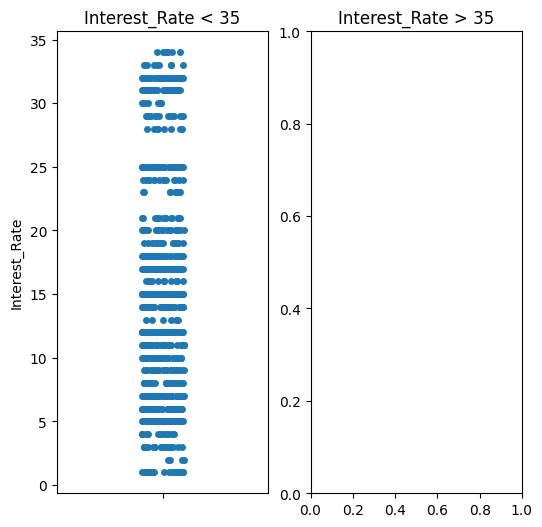

In [597]:
outlier_one(new_data)

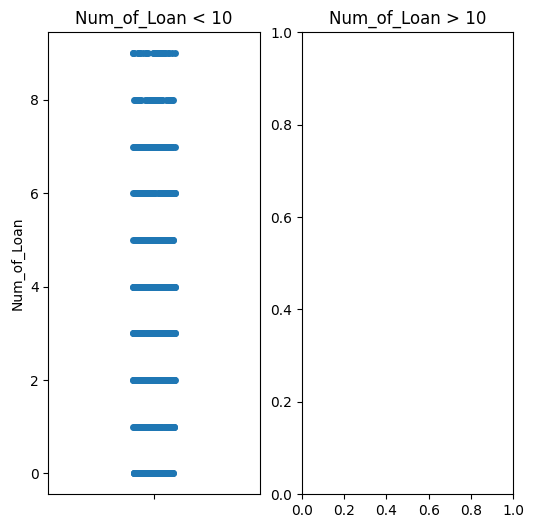

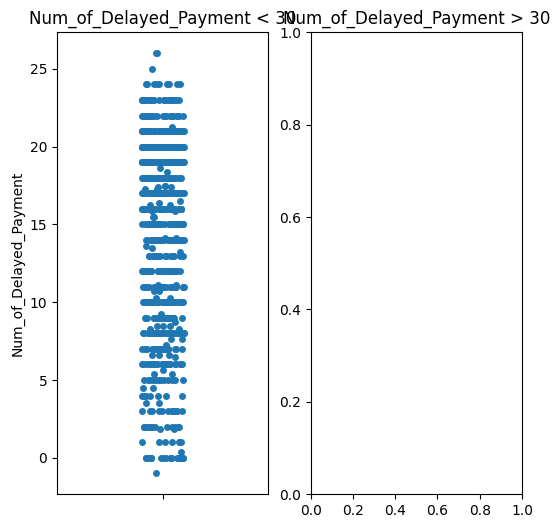

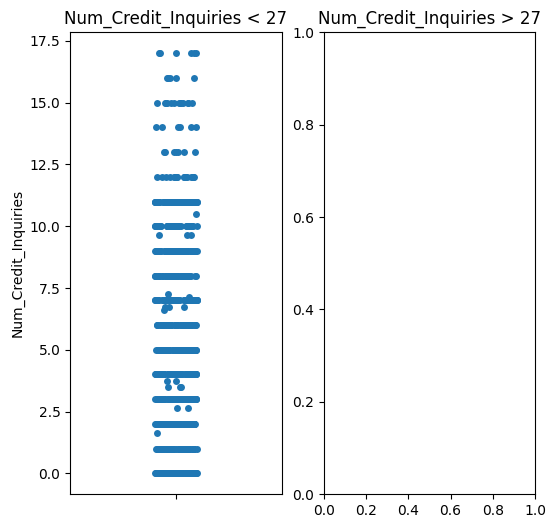

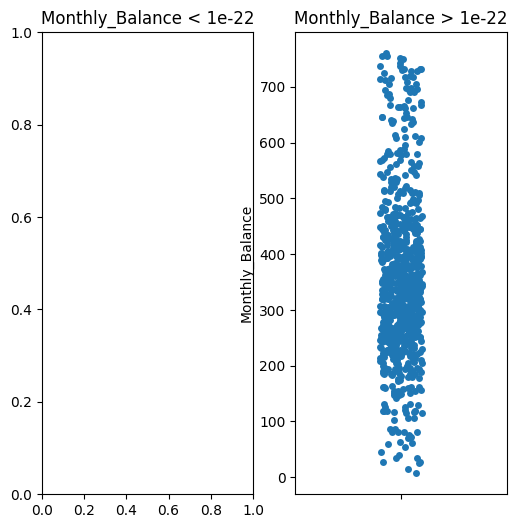

In [598]:
outlier_two(new_data)

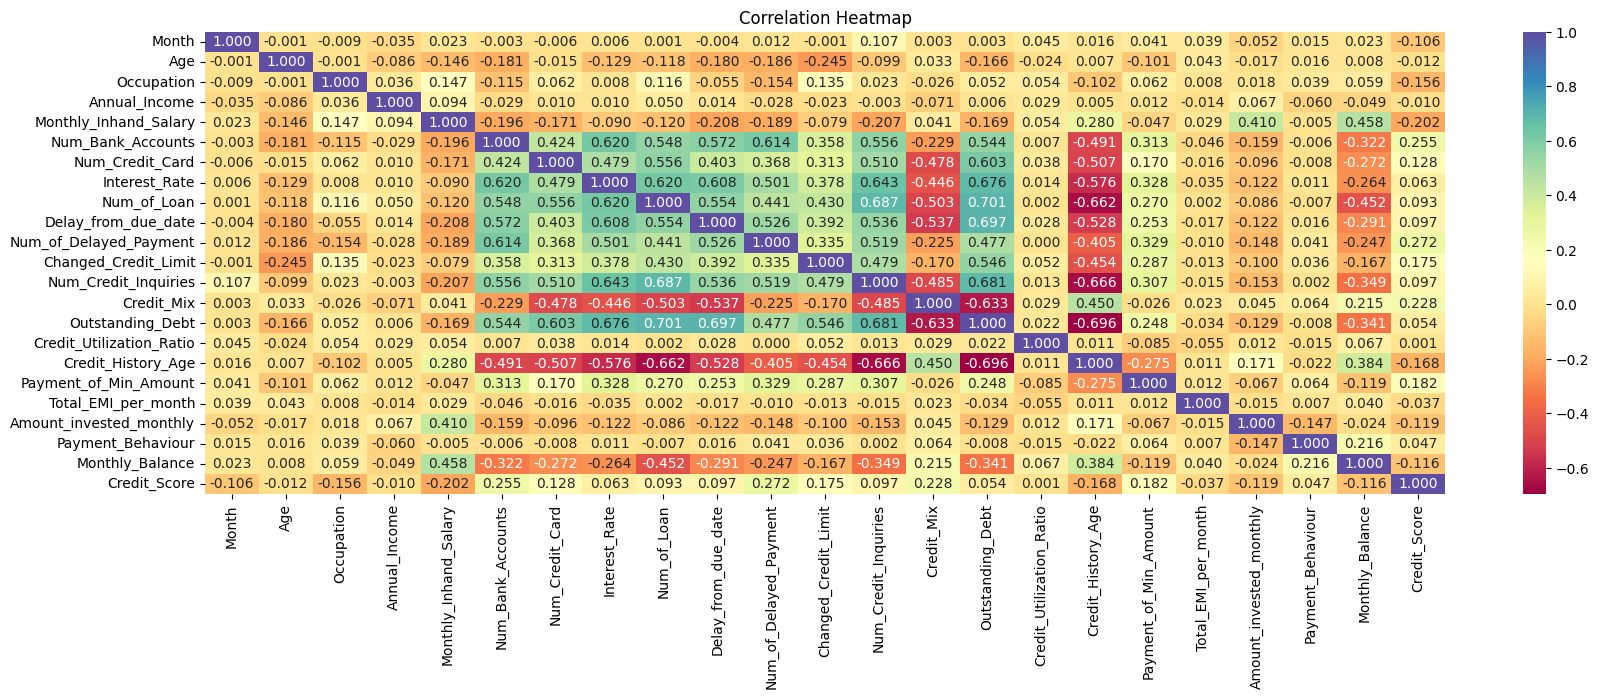

In [599]:
show_heat_map(new_data)

In [600]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler()

y = new_data["Credit_Score"]
X = new_data.drop("Credit_Score", axis=1)
X, y = sampler.fit_resample(X, y)

new_data = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

<Axes: ylabel='count'>

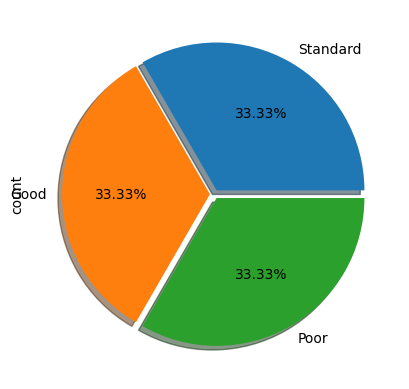

In [601]:
new_data["Credit_Score"].value_counts().plot.pie(
    explode=[0.03, 0.03, 0.03],
    autopct="%1.2f%%",
    shadow=True,
    labels=["Standard", "Good", "Poor"],
)

In [602]:
new_data.describe()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,1350.000000,1350.00000,1350.000000,1.350000e+03,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,4.669630,31.64963,7.648148,1.833508e+05,4012.221516,5.454815,5.478519,14.619259,3.612593,21.663796,12.934630,10.126106,5.507222,1.078519,1513.242126,31.841198,1.372593,1693.237515,285.414216,2.567130,362.675164,1.000000
std,2.281627,10.24233,4.170733,1.378604e+06,2863.283873,2.764375,1.981545,9.457184,2.513770,17.149912,6.697894,6.897016,4.040951,0.801998,1244.541161,5.003160,0.679896,8673.517764,378.830431,1.480983,150.863214,0.816799
min,1.000000,14.00000,0.000000,8.701545e+03,389.346562,0.000000,1.000000,1.000000,0.000000,-0.125000,-1.000000,-4.260000,0.000000,0.000000,35.540000,21.744884,0.000000,0.000000,0.000000,0.000000,7.129357,0.000000
25%,3.000000,23.00000,4.000000,1.979552e+04,1684.168333,3.000000,4.000000,7.000000,2.000000,8.000000,7.000000,5.270000,2.000000,0.000000,569.800000,27.912838,1.000000,34.813970,81.699521,1.750000,263.229996,0.000000
50%,5.000000,32.00000,8.000000,3.988722e+04,3037.986667,6.000000,5.000000,12.000000,3.000000,16.000000,14.000000,8.970000,5.000000,1.000000,1095.730000,31.745213,1.000000,71.544743,152.593046,3.000000,338.079868,1.000000
75%,7.000000,38.00000,11.750000,7.233098e+04,5799.450000,8.000000,7.000000,21.000000,5.750000,29.000000,19.000000,14.155000,9.000000,2.000000,2253.950000,35.962063,2.000000,185.111983,304.202810,4.000000,443.791400,2.000000
max,8.000000,55.00000,14.000000,2.233578e+07,12432.610000,10.000000,10.000000,34.000000,9.000000,67.000000,26.000000,32.640000,17.000000,2.000000,4984.820000,42.769864,2.000000,81441.000000,2772.302518,5.000000,760.364955,2.000000


In [603]:
result_list = {"Lasso" : [], "chi2" : [],"MIC" : [],"Ridge" : [],"RFE" : [],"PCA" : [], "MaxVoting" : [], "Stacking" : []}

def calculate(y_test, y_pred, method_name, num_of_features, model_name):
    
    result_list[method_name].append({
        "accuracy" : accuracy_score(y_test, y_pred),
        "f1" : f1_score(y_test, y_pred, average='weighted'),
        "recall" : recall_score(y_test, y_pred, average='weighted'), 
        "precision" :  precision_score(y_test, y_pred, average='weighted'),
        "number_of_features" : num_of_features, 
        "model_name" : model_name,
        })

In [604]:
X = new_data.drop("Credit_Score", axis=1)
y = new_data["Credit_Score"]

In [605]:
def fit_model(X_selected, y,method_name ,model, model_name):
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    calculate(y_test, y_pred, method_name,X_selected.shape[1], model_name)

In [606]:
def lasso(X,y):
    lasso = Lasso(alpha=0.042)
    lasso.fit(X, y)
    selected = X.columns[lasso.coef_ != 0]
    return X[selected]

In [607]:
X_selected = lasso(X,y)

fit_model(X_selected,y,"Lasso",RandomForestClassifier(n_jobs=-1), "RandomForestClassifier")
# fit_model(X_selected,y,"Lasso",DecisionTreeClassifier(), "DecisionTreeClassifier")
# fit_model(X_selected,y,"Lasso",GradientBoostingClassifier(), "GradientBoostingClassifier")


In [608]:
def select_kbest(X, y, method, k):
    k_best = SelectKBest(score_func=method, k=k)
    selected = k_best.fit_transform(X, y)
    return selected


scaler = MinMaxScaler()
X_min_max = pd.DataFrame(scaler.fit_transform(X))

for i in range(15,X.shape[1]+1):
    fit_model(select_kbest(X_min_max,y,chi2,i),y,"chi2",RandomForestClassifier(n_jobs=-1), "RandomForestClassifier")
    # fit_model(select_kbest(X_min_max,y,chi2,i),y,"chi2",DecisionTreeClassifier(), "DecisionTreeClassifier")
    # fit_model(select_kbest(X_min_max,y,chi2,i),y,"chi2",GradientBoostingClassifier(), "GradientBoostingClassifier")
    fit_model(select_kbest(X_min_max,y,mutual_info_classif,i),y,"MIC",RandomForestClassifier(n_jobs=-1), "RandomForestClassifier")
    # fit_model(select_kbest(X_min_max,y,mutual_info_classif,i),y,"MIC",DecisionTreeClassifier(), "DecisionTreeClassifier")
    # fit_model(select_kbest(X_min_max,y,mutual_info_classif,i),y,"MIC",GradientBoostingClassifier(), "GradientBoostingClassifier")

In [609]:
def ridge(X, y, k):
    ridge = Ridge(alpha=1)
    ridge.fit(X, y)
    feature_importance = np.abs(ridge.coef_)
    selected_feature_indices = np.argsort(feature_importance)[::-1][:k]
    X_selected = X.iloc[:, selected_feature_indices]
    return X_selected

for i in range (15,X.shape[1]+1):
    fit_model(ridge(X_min_max,y,i), y,"Ridge",RandomForestClassifier(n_jobs=-1),"RandomForestClassifier")
    # fit_model(ridge(X_min_max,y,i), y,"Ridge",DecisionTreeClassifier(),"DecisionTreeClassifier")
    # fit_model(ridge(X_min_max,y,i), y,"Ridge",GradientBoostingClassifier(),"GradientBoostingClassifier")


In [610]:
def RFE_feature_selection(X, y, model, k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
    rfe = RFE(model,n_features_to_select=k)
    rfe.fit(X_train, y_train)
    selected_features = rfe.support_
    selected_columns = X_train.columns[selected_features]
    return  X_train[selected_columns], X_test[selected_columns], y_train,y_test


def RFE_predict(X,y,model,model_name,k):
    X_train, X_test, y_train, y_test = RFE_feature_selection(X,y,model,k)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    calculate(y_test,y_pred,"RFE",X_train.shape[1],model_name)

for i in range (15,X.shape[1]+1):
    RFE_predict(X,y,RandomForestClassifier(n_jobs=-1),"RandomForestClassifier",i)
    # RFE_predict(X,y,DecisionTreeClassifier(),"DecisionTreeClassifier",i)
    # RFE_predict(X,y,GradientBoostingClassifier(),"GradientBoostingClassifier",i)

In [611]:
def PCA_feature_selection(X, k):
    pca = PCA(n_components = k)
    pca.fit(X)
    data = pca.transform(X)
    return data

for i in range(15,X.shape[1]+1):
    fit_model(PCA_feature_selection(X_min_max,i), y,"PCA",RandomForestClassifier(n_jobs=-1),"RandomForestClassifier")
    # fit_model(PCA_feature_selection(X_min_max,i), y,"PCA",DecisionTreeClassifier(),"DecisionTreeClassifier")
    # fit_model(PCA_feature_selection(X_min_max,i), y,"PCA",GradientBoostingClassifier(),"GradientBoostingClassifier")

In [612]:
for i in result_list:
    print(result_list[i])

[{'accuracy': 0.8925925925925926, 'f1': 0.8872707064378778, 'recall': 0.8925925925925926, 'precision': 0.905064253240354, 'number_of_features': 19, 'model_name': 'RandomForestClassifier'}]
[{'accuracy': 0.8851851851851852, 'f1': 0.8804096910294041, 'recall': 0.8851851851851852, 'precision': 0.8955183450789451, 'number_of_features': 15, 'model_name': 'RandomForestClassifier'}, {'accuracy': 0.8925925925925926, 'f1': 0.8883065258710252, 'recall': 0.8925925925925926, 'precision': 0.9033125808525266, 'number_of_features': 16, 'model_name': 'RandomForestClassifier'}, {'accuracy': 0.8814814814814815, 'f1': 0.8763115315354122, 'recall': 0.8814814814814815, 'precision': 0.8891859991859993, 'number_of_features': 17, 'model_name': 'RandomForestClassifier'}, {'accuracy': 0.8888888888888888, 'f1': 0.8861917707754168, 'recall': 0.8888888888888888, 'precision': 0.892980804328322, 'number_of_features': 18, 'model_name': 'RandomForestClassifier'}, {'accuracy': 0.9259259259259259, 'f1': 0.92296358508564

In [613]:
models_data = []

for model_name, model_data in result_list.items():
    for j in range(len(model_data)): 
        model_item = model_data[j]
        model_entry = {
            'method_name' : model_name,
            'model_name': model_item["model_name"],
            'accuracy': model_item["accuracy"],
            'f1': model_item["f1"],
            'recall': model_item["recall"],
            'precision': model_item["precision"],
            'number_of_features': model_item["number_of_features"],
        }
        models_data.append(model_entry)

new_dataframe = pd.DataFrame(models_data)
best_method = new_dataframe[new_dataframe["accuracy"] == new_dataframe["accuracy"].max()]
new_dataframe.head()


,method_name,model_name,accuracy,f1,recall,precision,number_of_features
0,Lasso,RandomForestClassifier,0.892593,0.887271,0.892593,0.905064,19
1,chi2,RandomForestClassifier,0.885185,0.880410,0.885185,0.895518,15
2,chi2,RandomForestClassifier,0.892593,0.888307,0.892593,0.903313,16
3,chi2,RandomForestClassifier,0.881481,0.876312,0.881481,0.889186,17
4,chi2,RandomForestClassifier,0.888889,0.886192,0.888889,0.892981,18


In [614]:
new_dataframe

,method_name,model_name,accuracy,f1,recall,precision,number_of_features
0,Lasso,RandomForestClassifier,0.892593,0.887271,0.892593,0.905064,19
1,chi2,RandomForestClassifier,0.885185,0.880410,0.885185,0.895518,15
2,chi2,RandomForestClassifier,0.892593,0.888307,0.892593,0.903313,16
3,chi2,RandomForestClassifier,0.881481,0.876312,0.881481,0.889186,17
4,chi2,RandomForestClassifier,0.888889,0.886192,0.888889,0.892981,18
5,chi2,RandomForestClassifier,0.925926,0.922964,0.925926,0.933194,19
6,chi2,RandomForestClassifier,0.911111,0.909277,0.911111,0.910681,20
7,chi2,RandomForestClassifier,0.911111,0.909330,0.911111,0.913711,21
8,chi2,RandomForestClassifier,0.911111,0.908248,0.911111,0.915577,22
9,MIC,RandomForestClassifier,0.881481,0.878767,0.881481,0.884052,15


In [615]:
method_name = best_method["method_name"].to_string().split(" ")[-1]
number_of_features = int(best_method["number_of_features"].to_string().split(" ")[-1])
method_name

'Ridge'

In [616]:
call_best_method = {
    "Lasso" :lambda _: lasso(X,y),
    "chi2" :lambda k: select_kbest(X_min_max,y,chi2,k),
    "MIC" : lambda k:select_kbest(X,y,mutual_info_classif,k),
    "Ridge" : lambda k: ridge(X,y,k),
    "RFE" : lambda k: RFE_feature_selection(X,y,DecisionTreeClassifier(),k),
    "PCA" : lambda k:PCA_feature_selection(X,k)
}

X_selected_features = call_best_method[method_name](number_of_features)

In [617]:
if type(X_selected_features) == tuple:
    X_train, X_test, y_train, y_test = X_selected_features
else:
    X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, test_size= 0.2, random_state=42)


In [618]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [619]:
models = [
    ("RandomForestClassifier",RandomForestClassifier(n_jobs=-1, n_estimators=100)), 
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("KNeighborsClassifier", KNeighborsClassifier(n_jobs=-1,n_neighbors=1)),
    ("ExtraTreeClassifier",ExtraTreeClassifier())
]

def max_voting():
    max_voting_model = VotingClassifier(models)
    max_voting_model.fit(X_train, y_train)
    prediction = max_voting_model.predict(X_test)

    calculate(y_test, prediction, "MaxVoting", number_of_features, "MaxVoting")

max_voting()

In [620]:
def stacking():
    stacked = StackingClassifier(estimators=models, final_estimator=RandomForestClassifier(n_estimators=150), n_jobs=-1)
    stacked.fit(X_train, y_train)
    predictions = stacked.predict(X_test)
    calculate(y_test, predictions, "Stacking", number_of_features, "Stacking")

stacking()

In [621]:
def add_to_dataframe(model, dataframe):
    models_data = []

    for j in range(len(result_list[model])): 
        model_item = result_list[model][j]
        model_entry = {
            'method_name' : model,
            'model_name': model_item["model_name"],
            'accuracy': model_item["accuracy"],
            'f1': model_item["f1"],
            'recall': model_item["recall"],
            'precision': model_item["precision"],
            'number_of_features': model_item["number_of_features"],
        }
        models_data.append(model_entry)

    temp_df =  pd.DataFrame(models_data)
    dataframe = pd.concat([dataframe, temp_df], ignore_index=True)
    return dataframe

In [622]:
new_dataframe = add_to_dataframe("MaxVoting", new_dataframe)
new_dataframe = add_to_dataframe("Stacking", new_dataframe)

In [623]:
new_dataframe

,method_name,model_name,accuracy,f1,recall,precision,number_of_features
0,Lasso,RandomForestClassifier,0.892593,0.887271,0.892593,0.905064,19
1,chi2,RandomForestClassifier,0.885185,0.880410,0.885185,0.895518,15
2,chi2,RandomForestClassifier,0.892593,0.888307,0.892593,0.903313,16
3,chi2,RandomForestClassifier,0.881481,0.876312,0.881481,0.889186,17
4,chi2,RandomForestClassifier,0.888889,0.886192,0.888889,0.892981,18
5,chi2,RandomForestClassifier,0.925926,0.922964,0.925926,0.933194,19
6,chi2,RandomForestClassifier,0.911111,0.909277,0.911111,0.910681,20
7,chi2,RandomForestClassifier,0.911111,0.909330,0.911111,0.913711,21
8,chi2,RandomForestClassifier,0.911111,0.908248,0.911111,0.915577,22
9,MIC,RandomForestClassifier,0.881481,0.878767,0.881481,0.884052,15
